<a href="https://colab.research.google.com/github/akluthra/ChatBots_GetQuote/blob/master/StockMarketAgent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tools and Libraries**
Data Collection: yfinance, Alpha Vantage API, IEX Cloud API

Data Analysis: pandas, numpy

Machine Learning: scikit-learn, TensorFlow, PyTorch

Execution: Alpaca API, Interactive Brokers API, Robinhood API

Infrastructure: AWS, Google Cloud, Docker

Final Notes
Regulation: Ensure your trading agent complies with all relevant regulations and laws.

Testing: Thoroughly test your agent in a simulated environment before deploying it with real money.

Continuous Learning: Stay updated with the latest developments in financial markets and machine learning.
Building a stock market trading agent is a complex task that requires a good understanding of both finance and technology. It’s also important to be aware of the risks involved in automated trading.

In [ ]:
!pip install alpaca-trade-api==2.3.0


In [ ]:
# Data Collection:
import yfinance as yf

def get_historical_data(ticker, period='1y'):
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)
    return histData


In [ ]:
# Feature Engineering:
import pandas as pd

def calculate_moving_average(data, window=20):
    data['MA'] = data['Close'].rolling(window=window).mean()
    return data


In [ ]:
# Machine Learning Model
from sklearn.linear_model import LinearRegression

def train_model(data):
    X = data[['MA', 'Volume']]
    y = data['Close']
    model = LinearRegression()
    model.fit(X, y)
    return model

In [ ]:
# Machine Learning Model:

from sklearn.linear_model import LinearRegression

def train_model(data):
    X = data[['MA', 'Volume']]
    y = data['Close']
    model = LinearRegression()
    model.fit(X, y)
    return model

In [ ]:
# Decision-Making:

def generate_signal(data, model):
    X = data[['MA', 'Volume']]
    predictions = model.predict(X)
    data['Signal'] = np.where(predictions > data['Close'], 1, -1)
    return data

In [ ]:
# Execution:
import alpaca_trade_api as tradeapi

api = tradeapi.REST('API_KEY', 'SECRET_KEY', base_url='https://paper-api.alpaca.markets')

def place_order(symbol, qty, side, type, time_in_force):
    api.submit_order(
        symbol=symbol,
        qty=qty,
        side=side,
        type=type,
        time_in_force=time_in_force
    )


To output results from the trading agent, you need to implement logging, visualization, and reporting mechanisms. Here’s how you can do it:

In [ ]:
# 1. Logging
# Logging is essential for tracking the agent's actions, errors, and performance.

import logging

# Configure logging
logging.basicConfig(filename='trading_agent.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def log_info(message):
    logging.info(message)

def log_error(message):
    logging.error(message)

In [ ]:
# 2. Visualization
# Visualization helps in understanding the performance and behavior of the trading agent.

import matplotlib.pyplot as plt

def plot_data(data, title='Stock Price and Moving Average'):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['MA'], label='Moving Average', color='orange')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [ ]:
# 3. Performance Reporting
# Generate performance reports to evaluate the trading agent's effectiveness.

def generate_performance_report(data):
    initial_balance = 10000  # Starting balance
    final_balance = initial_balance
    trades = 0
    profitable_trades = 0

    for index, row in data.iterrows():
        if row['Signal'] == 1:
            # Buy signal
            buy_price = row['Close']
            sell_price = data.loc[index + 1, 'Close']
            profit = sell_price - buy_price
            final_balance += profit
            trades += 1
            if profit > 0:
                profitable_trades += 1

    report = {
        'Initial Balance': initial_balance,
        'Final Balance': final_balance,
        'Total Trades': trades,
        'Profitable Trades': profitable_trades,
        'Win Rate': profitable_trades / trades if trades > 0 else 0,
        'Profit': final_balance - initial_balance
    }

    return report

In [ ]:
# Print the performance report
def print_performance_report(report):
    print(f"Initial Balance: ${report['Initial Balance']:.2f}")
    print(f"Final Balance: ${report['Final Balance']:.2f}")
    print(f"Total Trades: {report['Total Trades']}")
    print(f"Profitable Trades: {report['Profitable Trades']}")
    print(f"Win Rate: {report['Win Rate']:.2%}")
    print(f"Profit: ${report['Profit']:.2f}")


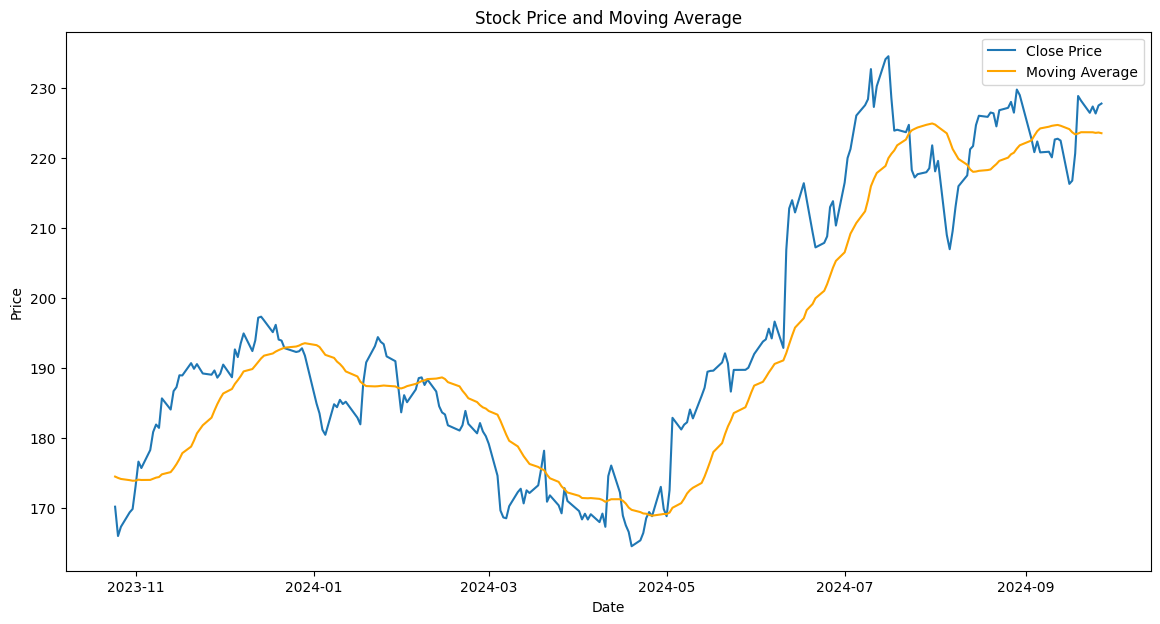

In [ ]:
# 4. Putting It All Together
# Combine all the components to output results

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Data Collection
def get_historical_data(ticker, period='1y'):
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)
    return hist

# Feature Engineering
def calculate_moving_average(data, window=20):
    data['MA'] = data['Close'].rolling(window=window).mean()
    return data

# Machine Learning Model
def train_model(data):
    X = data[['MA', 'Volume']]
    y = data['Close']
    model = LinearRegression()
    model.fit(X, y)
    return model

# Decision-Making
def generate_signal(data, model):
    # Check for infinite values and replace with NaN
    data[['MA', 'Volume']] = data[['MA', 'Volume']].replace([np.inf, -np.inf], np.nan)

    # Drop rows with missing values in 'MA' or 'Volume'
    data.dropna(subset=['MA', 'Volume'], inplace=True)

    X = data[['MA', 'Volume']]
    predictions = model.predict(X)
    data['Signal'] = np.where(predictions > data['Close'], 1, -1)
    return data

# Main Function
def main():
    ticker = 'AAPL'
    data = get_historical_data(ticker)
    data = calculate_moving_average(data)
    model = train_model(data.dropna())
    data = generate_signal(data, model)

    # Logging
    log_info(f"Data collected for {ticker}")

    # Visualization
    plot_data(data)



if __name__ == "__main__":
    main()

In [ ]:
 # Performance Reporting
def generate_performance_report(data):
  # Calculate performance metrics

  # Example: Total return
  total_return = (data['Close'][-1] - data['Close'][0]) / data['Close'][0]

  # Create a dictionary to store the report
  report = {
      'Total Return': total_return,
      # Add more metrics here
  }

  return report

# Example usage:
data = get_historical_data('AAPL') # Make sure to define get_historical_data
report = generate_performance_report(data)
print(report)


{'Total Return': 0.3413533895388696}


<ipython-input-44-265d12029cd1>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (data['Close'][-1] - data['Close'][0]) / data['Close'][0]


In [ ]:
# Logging Performance Report
    log_info(f"Performance Report: {report}")

Final Notes
Logging: **bold text** Ensure that your logging is detailed enough to capture all relevant information but not so verbose that it becomes unmanageable.
Visualization: Use visualization tools like Matplotlib, Seaborn, or Plotly to create insightful charts and graphs.
Performance Reporting: Regularly generate and review performance reports to understand the effectiveness of your trading agent.
Continuous Improvement: Use the output results to identify areas for improvement and optimize your trading agent accordingly.
By implementing these steps, you can effectively output and analyze the results of your stock market trading agent.